In [12]:
import numpy as np
from numba import njit, prange
import matplotlib.pyplot as plt

In [13]:
@njit(parallel=True, fastmath=True)
def morphological_erosion_numba(padded_image, kernel_size):
    pad = kernel_size // 2
    rows = padded_image.shape[0] - 2 * pad
    cols = padded_image.shape[1] - 2 * pad
    output = np.zeros((rows, cols), dtype=padded_image.dtype)

    for i in prange(rows):
        for j in range(cols):
            min_val = 255  
            for ki in range(kernel_size):
                for kj in range(kernel_size):
                    val = padded_image[i + ki, j + kj]
                    if val < min_val:
                        min_val = val
            output[i, j] = min_val
    return output

In [14]:
def morphological_erosion(image, kernel_size=3):
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    return morphological_erosion_numba(padded_image, kernel_size)

Original Image:
[[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90 100 110 120]
 [130 140 150 160]]

Eroded Image:
[[ 0  0  0  0]
 [ 0 10 20  0]
 [ 0 50 60  0]
 [ 0  0  0  0]]


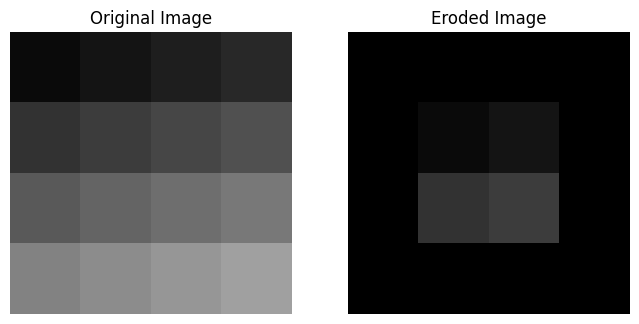

In [15]:
def test_erosion():
    img = np.array([
        [10, 20, 30, 40],
        [50, 60, 70, 80],
        [90, 100, 110, 120],
        [130, 140, 150, 160]
    ], dtype=np.uint8)

    print("Original Image:")
    print(img)

    eroded = morphological_erosion(img, kernel_size=3)
    print("\nEroded Image:")
    print(eroded)

    # Visualize
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Eroded Image")
    plt.imshow(eroded, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    plt.show()
if __name__ == "__main__":
    test_erosion()